In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1: Register and paste your API key here
api_key = "e14e4a2a79c989e0418ff49f3cf67836"

In [2]:
# STEP 2: Get weather forecast data (5 days / 3-hour interval)

lat, lon = 18.654539178037, 73.73420510737802  # Your location coordinates
api_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}"

response = requests.get(api_url)
weather_data = response.json()

print("Response Keys:", weather_data.keys())
print("Forecast count:", len(weather_data.get("list", [])))

Response Keys: dict_keys(['cod', 'message', 'cnt', 'list', 'city'])
Forecast count: 40


In [3]:
# STEP 3: Extract required fields into a DataFrame

timestamps = [pd.to_datetime(item['dt'], unit='s') for item in weather_data['list']]
temperatures = [item['main']['temp'] for item in weather_data['list']]
humidity = [item['main']['humidity'] for item in weather_data['list']]
wind_speed = [item['wind']['speed'] for item in weather_data['list']]
weather_description = [item['weather'][0]['description'] for item in weather_data['list']]

weather_df = pd.DataFrame({
    "Timestamp": timestamps,
    "Temperature": temperatures,
    "Humidity": humidity,
    "Wind_Speed": wind_speed,
    "Weather_Description": weather_description,
})

print(weather_df.head())

            Timestamp  Temperature  Humidity  Wind_Speed Weather_Description
0 2025-09-18 09:00:00       301.14        73        2.87       moderate rain
1 2025-09-18 12:00:00       299.37        81        3.32          light rain
2 2025-09-18 15:00:00       295.69        96        2.40          light rain
3 2025-09-18 18:00:00       295.33        96        2.07     overcast clouds
4 2025-09-18 21:00:00       294.82        96        2.14          light rain


In [4]:
# STEP 4: Handle missing values + Convert Kelvin → Celsius

# Replace missing values with 0 (simple handling for now)
weather_df.fillna(0, inplace=True)

# Convert temperature from Kelvin to Celsius
weather_df["Temperature"] = weather_df["Temperature"].apply(lambda x: x - 273.15 if isinstance(x, (int, float)) else x)

# Set Timestamp as index
weather_df.set_index("Timestamp", inplace=True)

print(weather_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40 entries, 2025-09-18 09:00:00 to 2025-09-23 06:00:00
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Temperature          40 non-null     float64
 1   Humidity             40 non-null     int64  
 2   Wind_Speed           40 non-null     float64
 3   Weather_Description  40 non-null     object 
dtypes: float64(2), int64(1), object(1)
memory usage: 1.6+ KB
None


In [5]:
# STEP 5: Analyze weather patterns (min, max, avg)

max_temp = weather_df["Temperature"].max()
min_temp = weather_df["Temperature"].min()
avg_temp = weather_df["Temperature"].mean()

print(f"Max Temp: {max_temp:.2f} °C")
print(f"Min Temp: {min_temp:.2f} °C")
print(f"Avg Temp: {avg_temp:.2f} °C")

Max Temp: 27.99 °C
Min Temp: 19.92 °C
Avg Temp: 22.93 °C


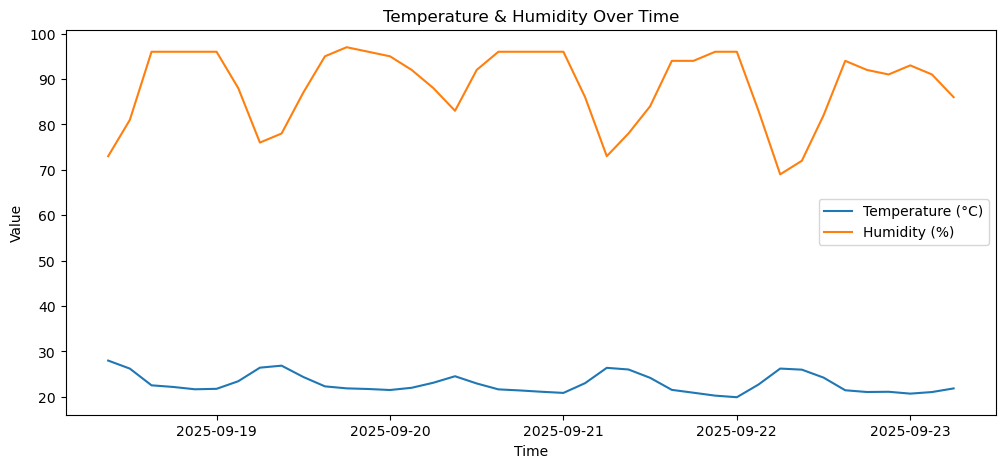

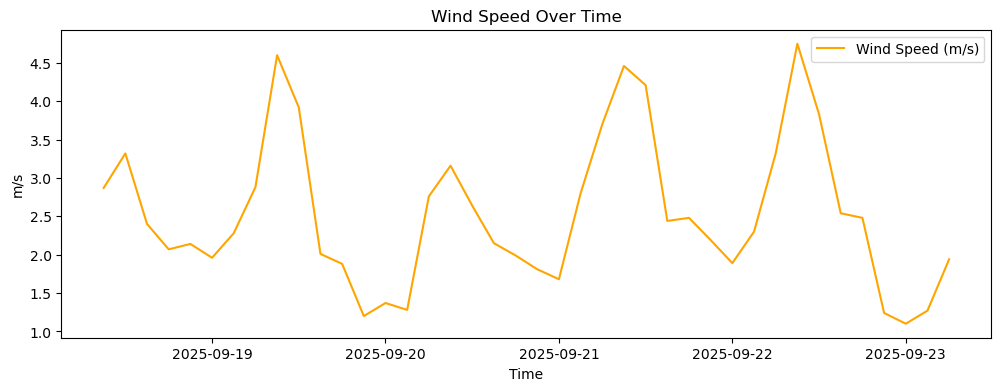

In [6]:
# STEP 6: Visualize data

plt.figure(figsize=(12,5))
plt.plot(weather_df.index, weather_df["Temperature"], label="Temperature (°C)")
plt.plot(weather_df.index, weather_df["Humidity"], label="Humidity (%)")
plt.title("Temperature & Humidity Over Time")
plt.xlabel("Time"); plt.ylabel("Value"); plt.legend(); plt.show()

plt.figure(figsize=(12,4))
plt.plot(weather_df.index, weather_df["Wind_Speed"], label="Wind Speed (m/s)", color="orange")
plt.title("Wind Speed Over Time")
plt.xlabel("Time"); plt.ylabel("m/s"); plt.legend(); plt.show()

In [7]:
# STEP 7: Aggregate by Day

daily_summary = weather_df.resample("D").agg({
    "Temperature": ["mean", "min", "max"],
    "Humidity": "mean",
    "Wind_Speed": "mean"
})

print("Daily Summary:")
print(daily_summary)

Daily Summary:
           Temperature               Humidity Wind_Speed
                  mean    min    max     mean       mean
Timestamp                                               
2025-09-18    24.12000  21.67  27.99   88.400   2.560000
2025-09-19    23.60000  21.73  26.87   89.125   2.591250
2025-09-20    22.28625  21.12  24.54   92.250   2.145000
2025-09-21    22.90250  20.27  26.39   87.625   2.995000
2025-09-22    22.84250  19.92  26.23   84.875   2.793750
2025-09-23    21.21000  20.71  21.86   90.000   1.436667


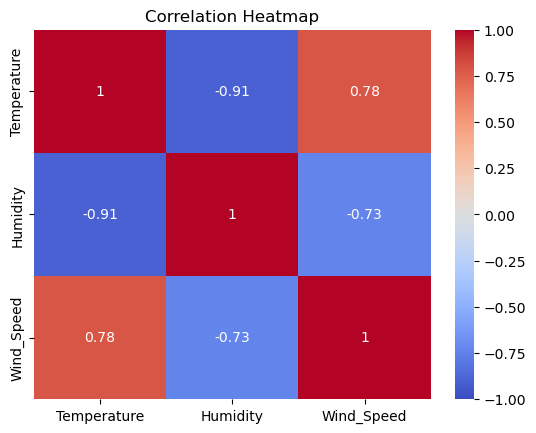

In [8]:
# STEP 8: Correlation between Temp, Humidity, Wind

corr = weather_df[["Temperature", "Humidity", "Wind_Speed"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()